<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.193300,84.971910,-0.009238,153.155972,153.164367,-0.008395
1,0.0,1.0,32.070973,74.447345,-0.002178,116.516140,116.519253,-0.003113
2,0.0,2.0,98.748676,51.762118,0.007828,160.518622,160.513397,0.005225
3,0.0,3.0,97.727379,98.700550,-0.003929,206.423999,206.424670,-0.000670
4,0.0,4.0,70.221551,46.490710,-0.002735,126.709526,126.716026,-0.006501
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.480623,45.541174,-0.003830,103.017966,103.019792,-0.001826
19996,999.0,16.0,85.624565,45.851141,-0.009115,141.466591,141.469778,-0.003188
19997,999.0,17.0,35.894605,48.109611,-0.007317,93.996899,94.003717,-0.006818
19998,999.0,18.0,67.220933,80.722047,0.005833,157.948813,157.943079,0.005733


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.193300  84.971910 -0.009238  153.155972  153.164367 -0.008395
      1.0    32.070973  74.447345 -0.002178  116.516140  116.519253 -0.003113
      2.0    98.748676  51.762118  0.007828  160.518622  160.513397  0.005225
      3.0    97.727379  98.700550 -0.003929  206.423999  206.424670 -0.000670
      4.0    70.221551  46.490710 -0.002735  126.709526  126.716026 -0.006501
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.480623  45.541174 -0.003830  103.017966  103.019792 -0.001826
      16.0   85.624565  45.851141 -0.009115  141.466591  141.469778 -0.003188
      17.0   35.894605  48.109611 -0.007317   93.996899   94.003717 -0.006818
      18.0   67.220933  80.722047  0.005833  157.948813  157.943079  0.005733
      19.0   70.091134  22.254382 -0.039245  102.306272  102.338416 -0.032144

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.193300  84.971910 -0.009238  153.155972  153.164367 -0.008395
      1.0    32.070973  74.447345 -0.002178  116.516140  116.519253 -0.003113
      2.0    98.748676  51.762118  0.007828  160.518622  160.513397  0.005225
      3.0    97.727379  98.700550 -0.003929  206.423999  206.424670 -0.000670
      4.0    70.221551  46.490710 -0.002735  126.709526  126.716026 -0.006501
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.480623  45.541174 -0.003830  103.017966  103.019792 -0.001826
      16.0   85.624565  45.851141 -0.009115  141.466591  141.469778 -0.003188
      17.0   35.894605  48.109611 -0.007317   93.996899   94.003717 -0.006818
      18.0   67.220933  80.722047  0.005833  157.948813  157.943079  0.005733
      19.0   70.091134  22.254382 -0.039245  102.306272  102.338416 -0.032144

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.193300,84.971910,-0.009238,153.155972,153.164367,-0.008395
1,0.0,1.0,32.070973,74.447345,-0.002178,116.516140,116.519253,-0.003113
2,0.0,2.0,98.748676,51.762118,0.007828,160.518622,160.513397,0.005225
3,0.0,3.0,97.727379,98.700550,-0.003929,206.423999,206.424670,-0.000670
4,0.0,4.0,70.221551,46.490710,-0.002735,126.709526,126.716026,-0.006501
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.480623,45.541174,-0.003830,103.017966,103.019792,-0.001826
19996,999.0,16.0,85.624565,45.851141,-0.009115,141.466591,141.469778,-0.003188
19997,999.0,17.0,35.894605,48.109611,-0.007317,93.996899,94.003717,-0.006818
19998,999.0,18.0,67.220933,80.722047,0.005833,157.948813,157.943079,0.005733


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.193300  84.971910 -0.009238  153.155972  153.164367 -0.008395
      1.0    32.070973  74.447345 -0.002178  116.516140  116.519253 -0.003113
      2.0    98.748676  51.762118  0.007828  160.518622  160.513397  0.005225
      3.0    97.727379  98.700550 -0.003929  206.423999  206.424670 -0.000670
      4.0    70.221551  46.490710 -0.002735  126.709526  126.716026 -0.006501
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.480623  45.541174 -0.003830  103.017966  103.019792 -0.001826
      16.0   85.624565  45.851141 -0.009115  141.466591  141.469778 -0.003188
      17.0   35.894605  48.109611 -0.007317   93.996899   94.003717 -0.006818
      18.0   67.220933  80.722047  0.005833  157.948813  157.943079  0.005733
      19.0   70.091134  22.254382 -0.039245  102.306272  102.338416 -0.032144

[20000 rows x 6 columns]

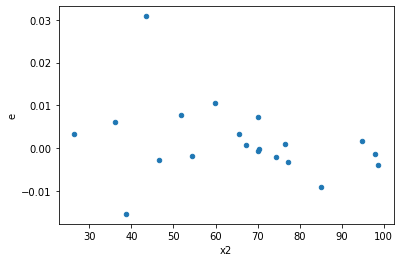

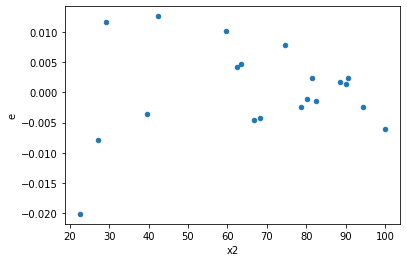

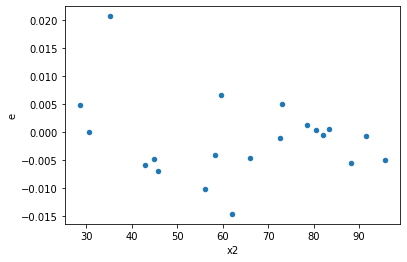

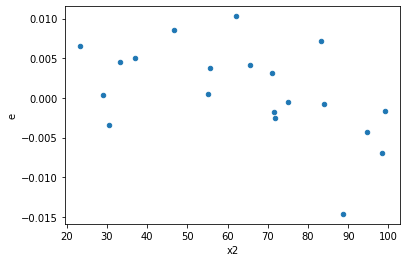

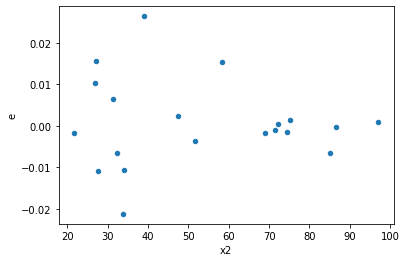

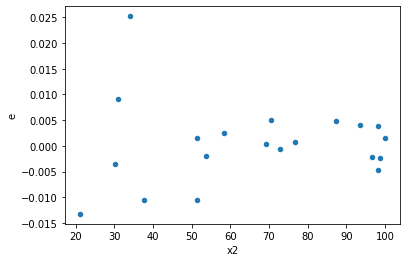

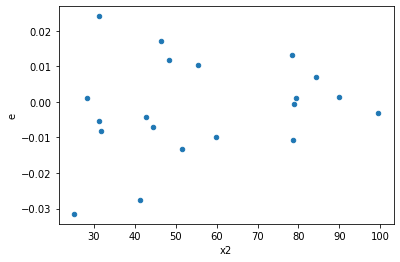

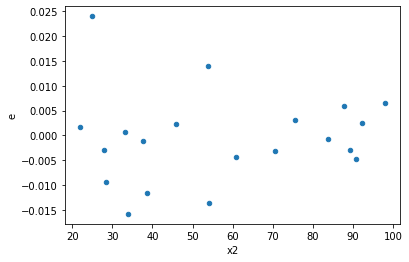

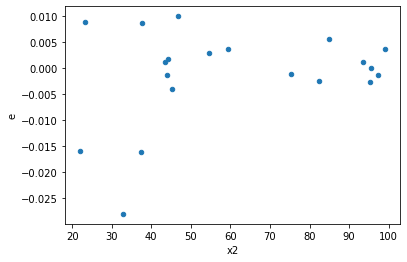

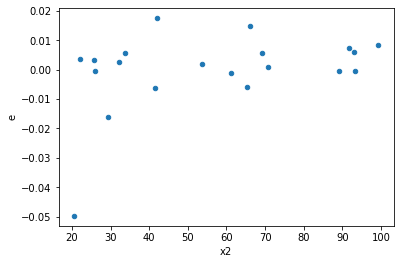

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,8.0,8.0,0.00011488158537155975,0.0008379136959138272,1.4360198171444969e-05,0.0001047392119892284,7.293716335858143,0.010928700312608619,0.9945356498436957,0.0054643501563043095,Reject001=1 : Homoscedasticity
3.0,5.0,11.0,4.0396277054653265e-05,0.00020917766147260359,8.079255410930653e-06,1.9016151042963963e-05,2.3537009384845633,0.21997694346901508,0.8900115282654925,0.10998847173450754,Reject001=1 : Homoscedasticity
5.0,6.0,10.0,3.6954961016210836e-05,0.001089775376370547,6.159160169368473e-06,0.0001089775376370547,17.69357098051059,0.0001711408565372441,0.9999144295717314,8.557042826862205e-05,Reject001=0 : Heteroscedasticity
9.0,11.0,5.0,0.0006665419656188347,0.002096700311827495,6.059472414716679e-05,0.00041934006236549903,6.920405501756971,0.04469243991066607,0.977653780044667,0.022346219955333035,Reject001=1 : Homoscedasticity
10.0,12.0,4.0,0.00048172653712395667,0.0005382815641480075,4.0143878093663054e-05,0.00013457039103700189,3.3522020648584174,0.2530583813711287,0.8734708093144357,0.12652919068556434,Reject001=1 : Homoscedasticity
11.0,7.0,9.0,0.00037599686263774425,0.0004884260457569446,5.371383751967775e-05,5.426956063966051e-05,1.0103459954761038,0.9647745225153825,0.5176127387423087,0.48238726125769127,Reject001=1 : Homoscedasticity
12.0,8.0,8.0,0.0005478756300001599,0.0008644902027950865,6.848445375001998e-05,0.00010806127534938581,1.577894973709333,0.5335302756118785,0.7332348621940608,0.26676513780593925,Reject001=1 : Homoscedasticity
13.0,8.0,8.0,0.00021367752186087608,0.0005152795160365314,2.670969023260951e-05,6.440993950456643e-05,2.411482085476573,0.23460244326959767,0.8826987783652012,0.11730122163479884,Reject001=1 : Homoscedasticity
14.0,4.0,12.0,2.224273006698906e-05,0.0014813978487726665,5.560682516747265e-06,0.00012344982073105555,22.200479951743016,3.57816388085741e-05,0.9999821091805957,1.789081940428705e-05,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,0.0012633596037283962,7.172983985918142e-05,0.00012633596037283962,1.1954973309863569e-05,0.09462842784099114,0.0015492875369052265,Reject001=0 : Heteroscedasticity
1.0,8.0,8.0,0.00011488158537155975,0.0008379136959138272,1.4360198171444969e-05,0.0001047392119892284,7.293716335858143,0.010928700312608619,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,0.0006840000033513824,0.00020499998535917976,8.55000004189228e-05,2.562499816989747e-05,0.2997075794660016,0.10805097095004666,Reject001=1 : Homoscedasticity
3.0,5.0,11.0,4.0396277054653265e-05,0.00020917766147260359,8.079255410930653e-06,1.9016151042963963e-05,2.3537009384845633,0.21997694346901508,Reject001=1 : Homoscedasticity
4.0,12.0,4.0,0.0011745350971184053,0.0004112384344946583,9.787792475986711e-05,0.00010280960862366458,1.0503860689312408,0.9357974171022887,Reject001=1 : Homoscedasticity
5.0,6.0,10.0,3.6954961016210836e-05,0.001089775376370547,6.159160169368473e-06,0.0001089775376370547,17.69357098051059,0.0001711408565372441,Reject001=0 : Heteroscedasticity
6.0,10.0,6.0,0.0024712679641262607,0.0006559897791500346,0.0002471267964126261,0.0001093316298583391,0.44241106770060157,0.24366005536417815,Reject001=1 : Homoscedasticity
7.0,13.0,3.0,0.0007880829459207393,0.00010439213821750016,6.06217650708261e-05,3.479737940583339e-05,0.5740080211319918,0.41539690635797233,Reject001=1 : Homoscedasticity
8.0,10.0,6.0,0.0009156404430808446,3.919875660111945e-05,9.156404430808446e-05,6.533126100186575e-06,0.07135034444530042,0.00047320732162726476,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      727
Reject001=0 : Heteroscedasticity    273
Name: Result_test, dtype: int64